In [289]:
from zoneinfo import available_timezones

# inport a csv
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [303]:
# get ev sales given a country and mode
def get_ev_sales(df_normalized, country, mode, parameter, category):
    filtered_df = df_normalized[
        (df_normalized["region"] == country) &
        (df_normalized["mode"] == mode) &
        (df_normalized["parameter"] == parameter) &
        (df_normalized["category"] == category)
        ]
    return filtered_df

# get all countries except World and other regions
def get_ev_sales_except_world(df_normalized):
    return df_normalized[df["region"] != "World" &
              (df_normalized["region"] != "Rest of the world") &
              (df_normalized["region"] != "Europe") &
              (df_normalized["region"] != "EU27")]

# create a function that will use the MinMaxScaler per country and normalize the values

    

In [304]:
def normalize_ev_sales(df):
    



In [291]:
# Normalizes values per country
def normalize_data_per_country(df):
    result = df.copy()
    result["value"] = (result["value"] - result["value"].mean()) / result["value"].std()
    return result

In [292]:
df = pd.read_csv("IEA Global EV Data 2024.csv")
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [293]:
# get list of unique countries
df["region"].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [294]:
# normalize data per country
df_normalized = normalize_ev_sales(df)


In [295]:
# select all Australia rows
df_Australia = get_ev_sales(df_normalized,"Australia", "Cars", "EV sales", "Historical")
df_Australia.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,-0.062288
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,-0.062270
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,-0.062283
10,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,-0.062280
14,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,-0.062267


In [296]:
df_USA = get_ev_sales(df_normalized, 
                      "USA", "Cars", "EV sales", "Historical")
df_USA.head()

,region,category,parameter,mode,powertrain,year,unit,value
10667,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,-0.062120
10687,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,-0.060866
10689,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,-0.061129
10694,USA,Historical,EV sales,Cars,PHEV,2012,Vehicles,-0.056610
10696,USA,Historical,EV sales,Cars,BEV,2012,Vehicles,-0.060108


# Powertrain
Battery Electric Vehicles (BEVs)
Hybrid Electric Vehicles (HEVs)
Plug-in Hybrid Electric Vehicles (PHEVs)

<Axes: xlabel='year', ylabel='value'>

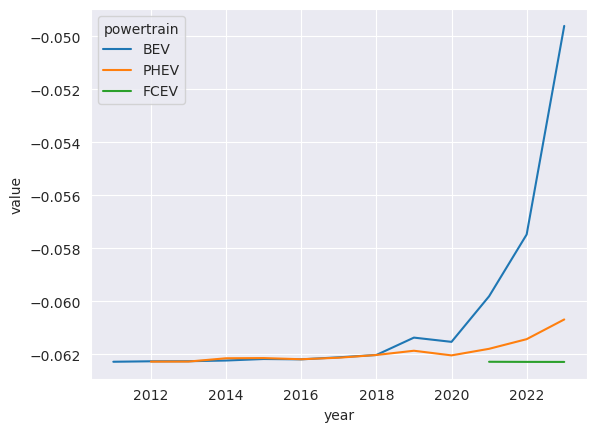

In [297]:
sns.lineplot(x="year", y="value", data=df_Australia, hue="powertrain")

<Axes: xlabel='year', ylabel='value'>

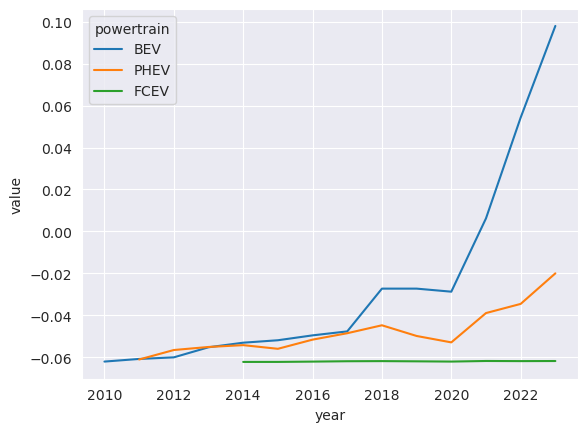

In [298]:
sns.lineplot(x="year", y="value", data=df_USA, hue="powertrain")

In [299]:
# create a heatmap for the powertrain column
au_pivoted_df = df_Australia.pivot(columns="year", index="powertrain", values="value")

<Axes: xlabel='year', ylabel='powertrain'>

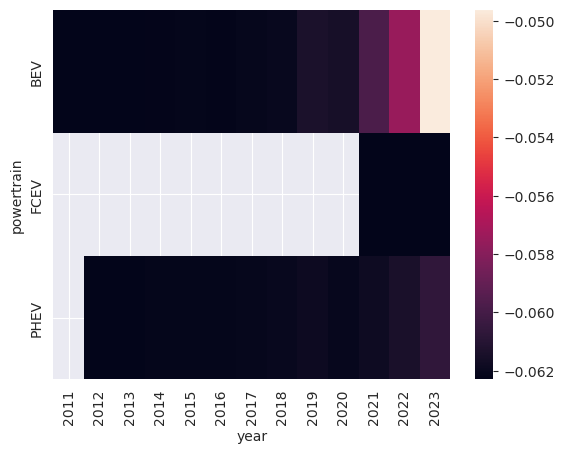

In [300]:
sns.heatmap(au_pivoted_df)

In [301]:
world_pivoted_df = df_USA.pivot(columns="year", index="powertrain", values="value")

<Axes: xlabel='year', ylabel='powertrain'>

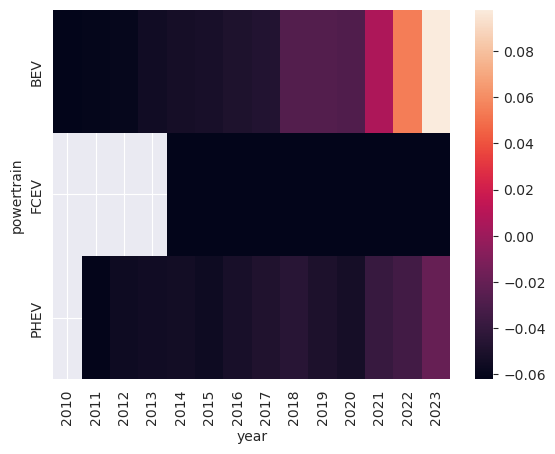

In [302]:
sns.heatmap(world_pivoted_df)